# Sentiment Analysis for Twitter Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from bs4 import BeautifulSoup
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.metrics import precision_recall_curve, confusion_matrix,classification_report
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from joblib import dump, load
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [53]:
!unzip -q '/content/drive/MyDrive/Sentiment_Analysis/tweets1.zip' -d '/content/drive/MyDrive/Sentiment-Analysis/tweets1'

In [57]:
df = pd.read_csv('/content/drive/MyDrive/Sentiment-Analysis/tweets1/Tweets.csv')
df.head(10)

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative
5,28b57f3990,http://www.dothebouncy.com/smf - some shameles...,http://www.dothebouncy.com/smf - some shameles...,neutral
6,6e0c6d75b1,2am feedings for the baby are fun when he is a...,fun,positive
7,50e14c0bb8,Soooo high,Soooo high,neutral
8,e050245fbd,Both of you,Both of you,neutral
9,fc2cbefa9d,Journey!? Wow... u just became cooler. hehe....,Wow... u just became cooler.,positive


**For the classification of sentiments, we are intereseted in the content and sentiment part ony. So, we select the particular columns the dataframe.**

In [56]:
columns = ['text','sentiment']
filteredDf = df[columns]
filteredDf.head(10)

,text,sentiment
0,"I`d have responded, if I were going",neutral
1,Sooo SAD I will miss you here in San Diego!!!,negative
2,my boss is bullying me...,negative
3,what interview! leave me alone,negative
4,"Sons of ****, why couldn`t they put them on t...",negative
5,http://www.dothebouncy.com/smf - some shameles...,neutral
6,2am feedings for the baby are fun when he is a...,positive
7,Soooo high,neutral
8,Both of you,neutral
9,Journey!? Wow... u just became cooler. hehe....,positive


**We use one hot encoding to convert the sentiments labels to numeric form.**

In [58]:
onehotSentiment = pd.get_dummies(filteredDf['sentiment'])
onehotSentiment.head(10)

,negative,neutral,positive
0,False,True,False
1,True,False,False
2,True,False,False
3,True,False,False
4,True,False,False
5,False,True,False
6,False,False,True
7,False,True,False
8,False,True,False
9,False,False,True


In [59]:
filteredDf= filteredDf.join(onehotSentiment)
filteredDf.head(10)

,text,sentiment,negative,neutral,positive
0,"I`d have responded, if I were going",neutral,False,True,False
1,Sooo SAD I will miss you here in San Diego!!!,negative,True,False,False
2,my boss is bullying me...,negative,True,False,False
3,what interview! leave me alone,negative,True,False,False
4,"Sons of ****, why couldn`t they put them on t...",negative,True,False,False
5,http://www.dothebouncy.com/smf - some shameles...,neutral,False,True,False
6,2am feedings for the baby are fun when he is a...,positive,False,False,True
7,Soooo high,neutral,False,True,False
8,Both of you,neutral,False,True,False
9,Journey!? Wow... u just became cooler. hehe....,positive,False,False,True


The content fielf of dataframe contains some URLs and special characters. So we remove them as they are not important in describing the sentiments.

In [61]:
import re
import pandas as pd
from wordcloud import STOPWORDS

# Example DataFrame
# filteredDf = pd.DataFrame({"content": ["Hello @world! Visit http://test.com #amazing",
#                                        "This is %great but &hard"]})

# Define stopwords
stpwords = set(STOPWORDS)

# Cleaning function
def clean_text(text):
    if pd.isna(text):  # handle NaN values
        return ""
    text = str(text)
    text = re.sub(r"http\S+", "", text)            # Remove URLs
    text = text.translate(str.maketrans('', '', '&@#%'))  # Remove special chars
    words = [w for w in text.split() if w.lower() not in stpwords]  # Remove stopwords
    return " ".join(words)

# Apply cleaning
filteredDf['text'] = filteredDf['text'].apply(clean_text)

print(filteredDf.head(10))


                                                text sentiment  negative  \
0                               I`d responded, going   neutral     False   
1                    Sooo SAD will miss San Diego!!!  negative      True   
2                                boss bullying me...  negative      True   
3                             interview! leave alone  negative      True   
4    Sons ****, couldn`t put releases already bought  negative      True   
5      - shameless plugging best Rangers forum earth   neutral     False   
6                  2am feedings baby fun smiles coos  positive     False   
7                                         Soooo high   neutral     False   
8                                                      neutral     False   
9  Journey!? Wow... u became cooler. hehe... (is ...  positive     False   

   neutral  positive  
0     True     False  
1    False     False  
2    False     False  
3    False     False  
4    False     False  
5     True     False  
6 

In [62]:
def wordCloud(text):
    wordcloud = WordCloud(stopwords=stpwords, background_color="white",width=800,height=800).generate(text)
    return wordcloud

In [63]:
def plotWordCloud(wordcloud):
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

In [65]:
words = " ".join(line.strip() for line in filteredDf.text)

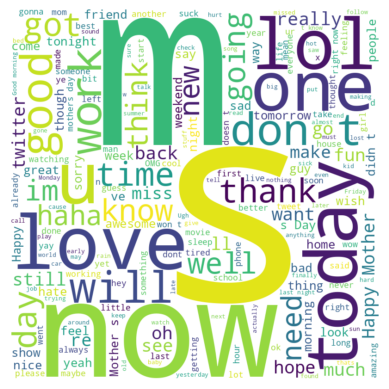

In [66]:
wordcloudAllContents = wordCloud(words)
plotWordCloud(wordcloudAllContents)

**The above wordcloud shows the common words for every sentiments.**

**Now we are going to see which words are important to** **describe three sentiments: neutral, pleasant and** **unpleasant using logistic regression.**

# Logistic Regression

In [68]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

stop_words = stopwords.words('english')

countVect = CountVectorizer(
    binary=False,
    stop_words=stop_words,
    token_pattern="[a-zA-Z]{2,}",  # only words with at least 2 letters
    min_df=5,
    max_df=0.95
)

features = countVect.fit_transform(filteredDf.text)
allFeatures = countVect.get_feature_names_out()

print(allFeatures[:20])  # just check first 20


['aaaah' 'aah' 'abandoned' 'ability' 'abit' 'able' 'absolutely' 'abt' 'ac'
 'academy' 'accept' 'accepted' 'accepting' 'access' 'accident'
 'accidentally' 'accomplished' 'according' 'account' 'accounts']


Since there are 3 sentiments, we use 3 logistic regressions keeping one sentiment label as 1 at a time and keeping two other labels as 0( done by one hot encoding).

For each label, we split the dataset into training and testing dataset and perform binary classification. We have used grid search for corss validation.

In [70]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(features,filteredDf.neutral , test_size=0.1, random_state=6)
X_train2, X_test2, y_train2, y_test2 = train_test_split(features,filteredDf.positive , test_size=0.1, random_state=6)
X_train3, X_test3, y_train3, y_test3 = train_test_split(features,filteredDf.negative , test_size=0.1, random_state=6)

In [71]:
def model(X_train,y_train):
    params = {
        'C':[0.07,0.09,0.1,0.2,0.3,0.5,1]
    }

    logisticModel = LogisticRegression(random_state=6,verbose=0,n_jobs=-1,class_weight='balanced')
    gridSearch = GridSearchCV(logisticModel, params,verbose=3,n_jobs=-1)
    gridSearch.fit(X_train,y_train)

    return(gridSearch.best_estimator_)

In [72]:
modelNeutral = model(X_train1, y_train1)
print(modelNeutral)
dump(modelNeutral, '/content/neutralClassifier_twitter.joblib')

Fitting 5 folds for each of 7 candidates, totalling 35 fits
LogisticRegression(C=0.2, class_weight='balanced', n_jobs=-1, random_state=6)


['/content/neutralClassifier_twitter.joblib']

In [73]:
modelPleasant = model(X_train2, y_train2)
print(modelPleasant)
dump(modelPleasant, '/content/positiveClassifier_twitter.joblib')

Fitting 5 folds for each of 7 candidates, totalling 35 fits
LogisticRegression(C=0.2, class_weight='balanced', n_jobs=-1, random_state=6)


['/content/positiveClassifier_twitter.joblib']

In [74]:
modelUnpleasant = model(X_train3, y_train3)
print(modelUnpleasant)
dump(modelUnpleasant, '/content/negativeClassifier_twitter.joblib')

Fitting 5 folds for each of 7 candidates, totalling 35 fits
LogisticRegression(C=0.5, class_weight='balanced', n_jobs=-1, random_state=6)


['/content/negativeClassifier_twitter.joblib']

In [75]:
def wordCloudFromFrequency(dictionary):
    return WordCloud(stopwords=stpwords, background_color="white",width=800,height=800).\
                                                generate_from_frequencies(dictionary)

the accuracy of training set is :0.7493530648552482
the accuracy of testing set is :0.6969807202619134
[[1007  559]
 [ 274  909]]
              precision    recall  f1-score   support

       False       0.79      0.64      0.71      1566
        True       0.62      0.77      0.69      1183

    accuracy                           0.70      2749
   macro avg       0.70      0.71      0.70      2749
weighted avg       0.71      0.70      0.70      2749



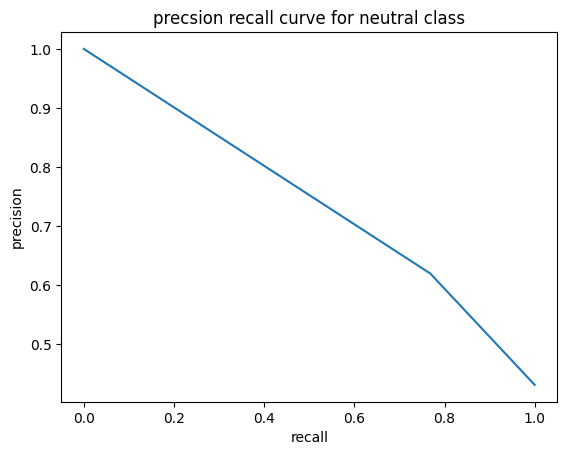

In [76]:
loadedModel = load('/content/neutralClassifier_twitter.joblib')
trainPredict1LR = loadedModel.predict(X_train1)
accuracyLR1train = accuracy_score(y_train1, trainPredict1LR)
print("the accuracy of training set is :{}".format(accuracyLR1train))

testPredict1LR = loadedModel.predict(X_test1)
accuracyLR1test = accuracy_score(y_test1, testPredict1LR)
print("the accuracy of testing set is :{}".format(accuracyLR1test))

print(confusion_matrix(y_test1,testPredict1LR))
print(classification_report(y_test1,testPredict1LR))
precision, recall, threshold = precision_recall_curve(y_test1,testPredict1LR)
plt.plot(recall, precision)
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('precsion recall curve for neutral class')
plt.show()

the accuracy of training set is :0.8716642406598738
the accuracy of testing set is :0.8534012368133866
[[1680  225]
 [ 178  666]]
              precision    recall  f1-score   support

       False       0.90      0.88      0.89      1905
        True       0.75      0.79      0.77       844

    accuracy                           0.85      2749
   macro avg       0.83      0.84      0.83      2749
weighted avg       0.86      0.85      0.85      2749



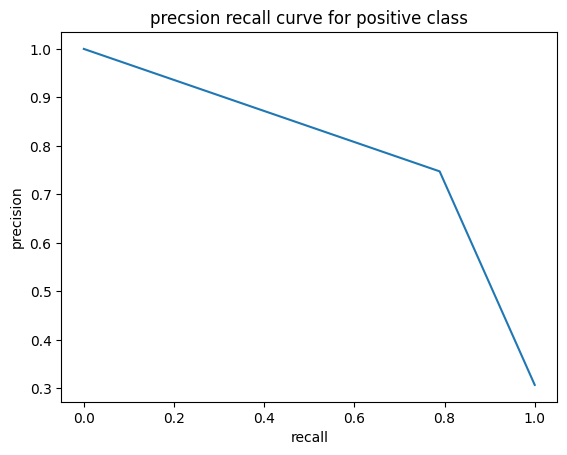

In [77]:
modelPleasant = load('/content/positiveClassifier_twitter.joblib')
trainPredict2LR = modelPleasant.predict(X_train2)
accuracyLR2train = accuracy_score(y_train2, trainPredict2LR)
print("the accuracy of training set is :{}".format(accuracyLR2train))

testPredict2LR = modelPleasant.predict(X_test2)
accuracyLR2test = accuracy_score(y_test2, testPredict2LR)
print("the accuracy of testing set is :{}".format(accuracyLR2test))

print(confusion_matrix(y_test2,testPredict2LR))
print(classification_report(y_test2,testPredict2LR))
precision, recall, threshold = precision_recall_curve(y_test2,testPredict2LR)
plt.plot(recall, precision)
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('precsion recall curve for positive class')
plt.show()

the accuracy of training set is :0.8608685104318292
the accuracy of testing set is :0.8072026191342306
[[1697  330]
 [ 200  522]]
              precision    recall  f1-score   support

       False       0.89      0.84      0.86      2027
        True       0.61      0.72      0.66       722

    accuracy                           0.81      2749
   macro avg       0.75      0.78      0.76      2749
weighted avg       0.82      0.81      0.81      2749



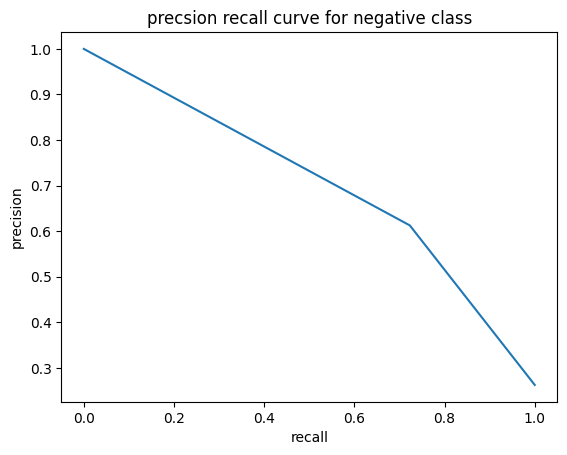

In [78]:
modelUnpleasant = load('/content/negativeClassifier_twitter.joblib')
trainPredict3LR = modelUnpleasant.predict(X_train3)
accuracyLR3train = accuracy_score(y_train3, trainPredict3LR)
print("the accuracy of training set is :{}".format(accuracyLR3train))

testPredict3LR = modelUnpleasant.predict(X_test3)
accuracyLR3test = accuracy_score(y_test3, testPredict3LR)
print("the accuracy of testing set is :{}".format(accuracyLR3test))

print(confusion_matrix(y_test3,testPredict3LR))
print(classification_report(y_test3,testPredict3LR))
precision, recall, threshold = precision_recall_curve(y_test3,testPredict3LR)
plt.plot(recall, precision)
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('precsion recall curve for negative class')
plt.show()

In [79]:
neutralEg = {}
indicesForNeutralEg = np.argsort(-1*modelNeutral.coef_)[:,0:100][0]
for i in indicesForNeutralEg[0:100]:
    neutralEg[allFeatures[i]] = modelNeutral.coef_[0,i]

In [80]:
dict(list(neutralEg.items())[0:10])

{'tho': np.float64(0.7675440222867705),
 'guitar': np.float64(0.7536913634144025),
 'training': np.float64(0.71998711076921),
 'jst': np.float64(0.679872423913233),
 'moro': np.float64(0.6696805119590802),
 'goin': np.float64(0.6645266047337668),
 'worked': np.float64(0.6595157785076758),
 'sp': np.float64(0.625045817336887),
 'gots': np.float64(0.6199493859048428),
 'nope': np.float64(0.610971752344303)}

**The above list shows 10 top words having high feature importance responsible for classifying neutral sentiments.**

In [81]:
pleasantEg = {}
indicesForPleasantEg = np.argsort(-1*modelPleasant.coef_)[:,0:100][0]
for i in indicesForPleasantEg[0:100]:
    pleasantEg[allFeatures[i]] = modelPleasant.coef_[0,i]

In [82]:
dict(list(pleasantEg.items())[0:10])

{'thanks': np.float64(2.784912450963953),
 'awesome': np.float64(2.5723782965500113),
 'thank': np.float64(2.538842179608751),
 'happy': np.float64(2.457012269346926),
 'love': np.float64(2.4425949401661295),
 'nice': np.float64(2.345997267663625),
 'amazing': np.float64(2.2267312672264223),
 'excited': np.float64(2.2123473773552673),
 'great': np.float64(2.157948492781655),
 'cute': np.float64(2.134899070606979)}

**Similarly, the above list shows top 10 words responsible for classifying positive sentiments.**

In [83]:
unpleasantEg = {}
indicesForUnpleasantEg = np.argsort(-1*modelUnpleasant.coef_)[:,0:100][0]
for i in indicesForUnpleasantEg[0:100]:
    unpleasantEg[allFeatures[i]] = modelUnpleasant.coef_[0,i]

In [84]:
dict(list(unpleasantEg.items())[0:10])

{'sad': np.float64(2.885841298415017),
 'sucks': np.float64(2.7925250518746267),
 'hate': np.float64(2.5787263158018856),
 'missing': np.float64(2.5559349942717593),
 'sorry': np.float64(2.4738396413816277),
 'miss': np.float64(2.459251799795022),
 'stupid': np.float64(2.451973824799949),
 'worst': np.float64(2.3950129917681604),
 'headache': np.float64(2.378454075890622),
 'wtf': np.float64(2.3769004385592054)}

**In the same way, the above list shows top 10 words responsible for classifying negative sentiments.**

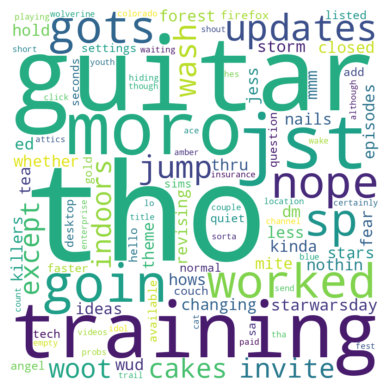

In [85]:
wordcloudNeutral = wordCloudFromFrequency(neutralEg)
plotWordCloud(wordcloudNeutral)

**The above wordcloud shows the top 100 words which are used for neutral sentiment description.**

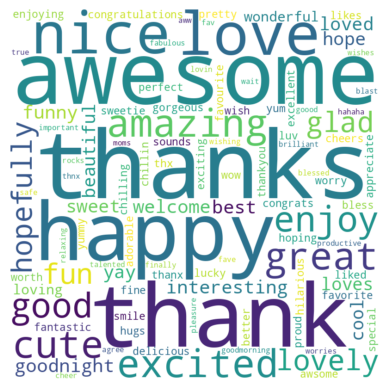

In [86]:
wordcloudPleasant = wordCloudFromFrequency(pleasantEg)
plotWordCloud(wordcloudPleasant)

**The above wordcloud shows the top 100 words used for positive sentiment classification.**

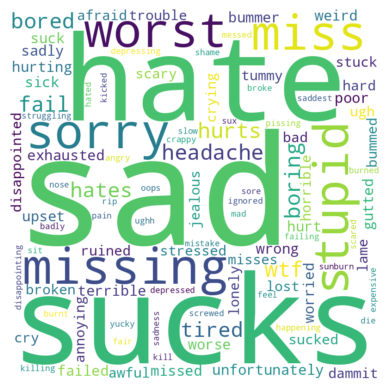

In [87]:
wordcloudUnpleasant = wordCloudFromFrequency(unpleasantEg)
plotWordCloud(wordcloudUnpleasant)

**The above wordcloud shows the top 100 words used for negative sentiment classification.**

In [88]:
wordcloudNeutral.to_file('/content/neturalUnbalanced.png')
wordcloudPleasant.to_file('/content/positiveUnbalanced.png')
wordcloudUnpleasant.to_file('/content/negativeUnbalanced.png')